In [1]:
%matplotlib inline
import seaborn
import quandl
import pandas as pd
import seaborn as sns
from datetime import datetime
token="Us3wFmXGgAj_1cUtHAAR"

import pylab
pylab.rcParams['figure.figsize'] = (24, 18)

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
def clean_up_columns(data):
    df=pd.DataFrame()
    for old_name in data.columns:
        new_name = old_name.split('TRc1')[0][:-1]
        df[new_name]=data[old_name]
    return df

In [14]:
data=pd.read_csv('Price.csv',index_col=0,parse_dates=['Date']).resample(rule='d',how='last')
price = clean_up_columns(data)
data=pd.read_csv('Volume.csv',index_col=0,parse_dates=['Date']).resample(rule='m',how='mean')
vol = clean_up_columns(data)

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  if __name__ == '__main__':
/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  app.launch_new_instance()


In [15]:
qd=pd.read_csv('liquid_contracts.csv',index_col=0,parse_dates=['Date']).resample(rule='d',how='last')
markets=pd.read_csv('contracts.csv',index_col=0)
volume=pd.read_csv('volume_data.csv',index_col=0,parse_dates=['Date']).resample(rule='m',how='sum')
fx=pd.read_csv('currency.csv',index_col=0,parse_dates=['DATE'])

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  if __name__ == '__main__':
/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  app.launch_new_instance()


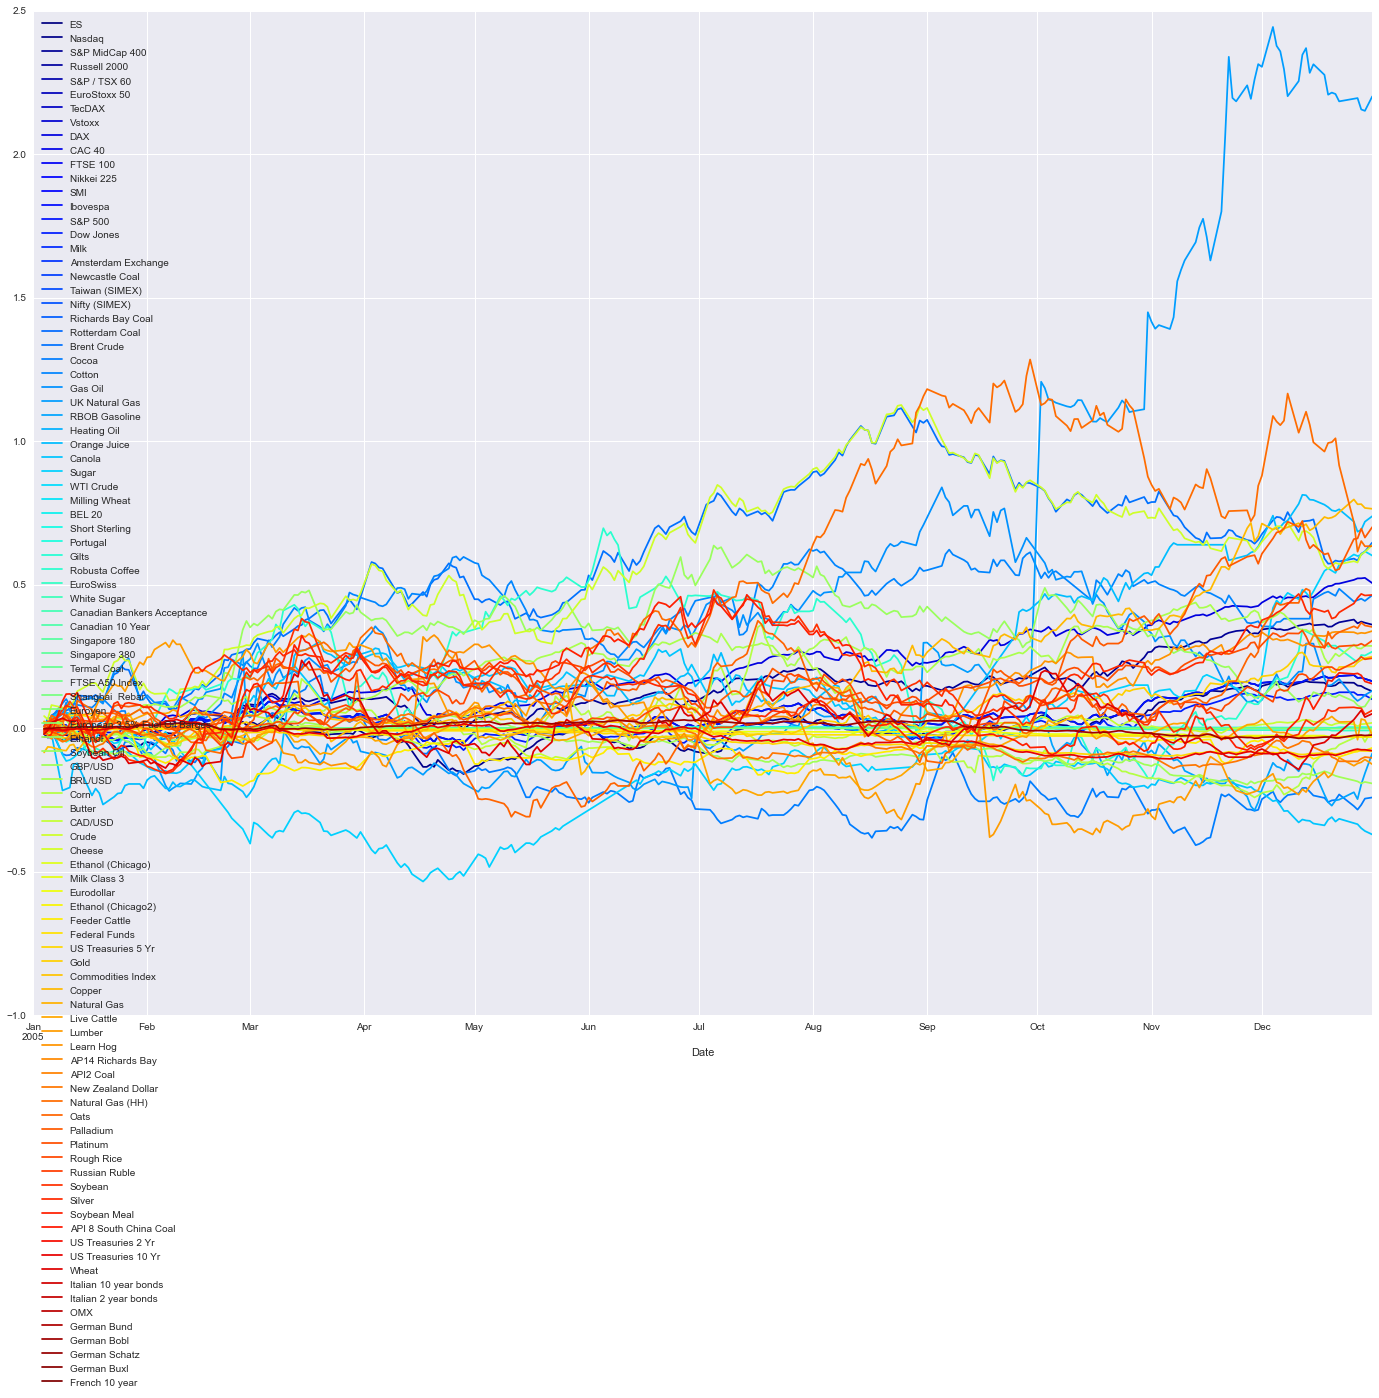

In [20]:
qd['2005'].pct_change().ffill().cumsum().plot(colormap='jet')

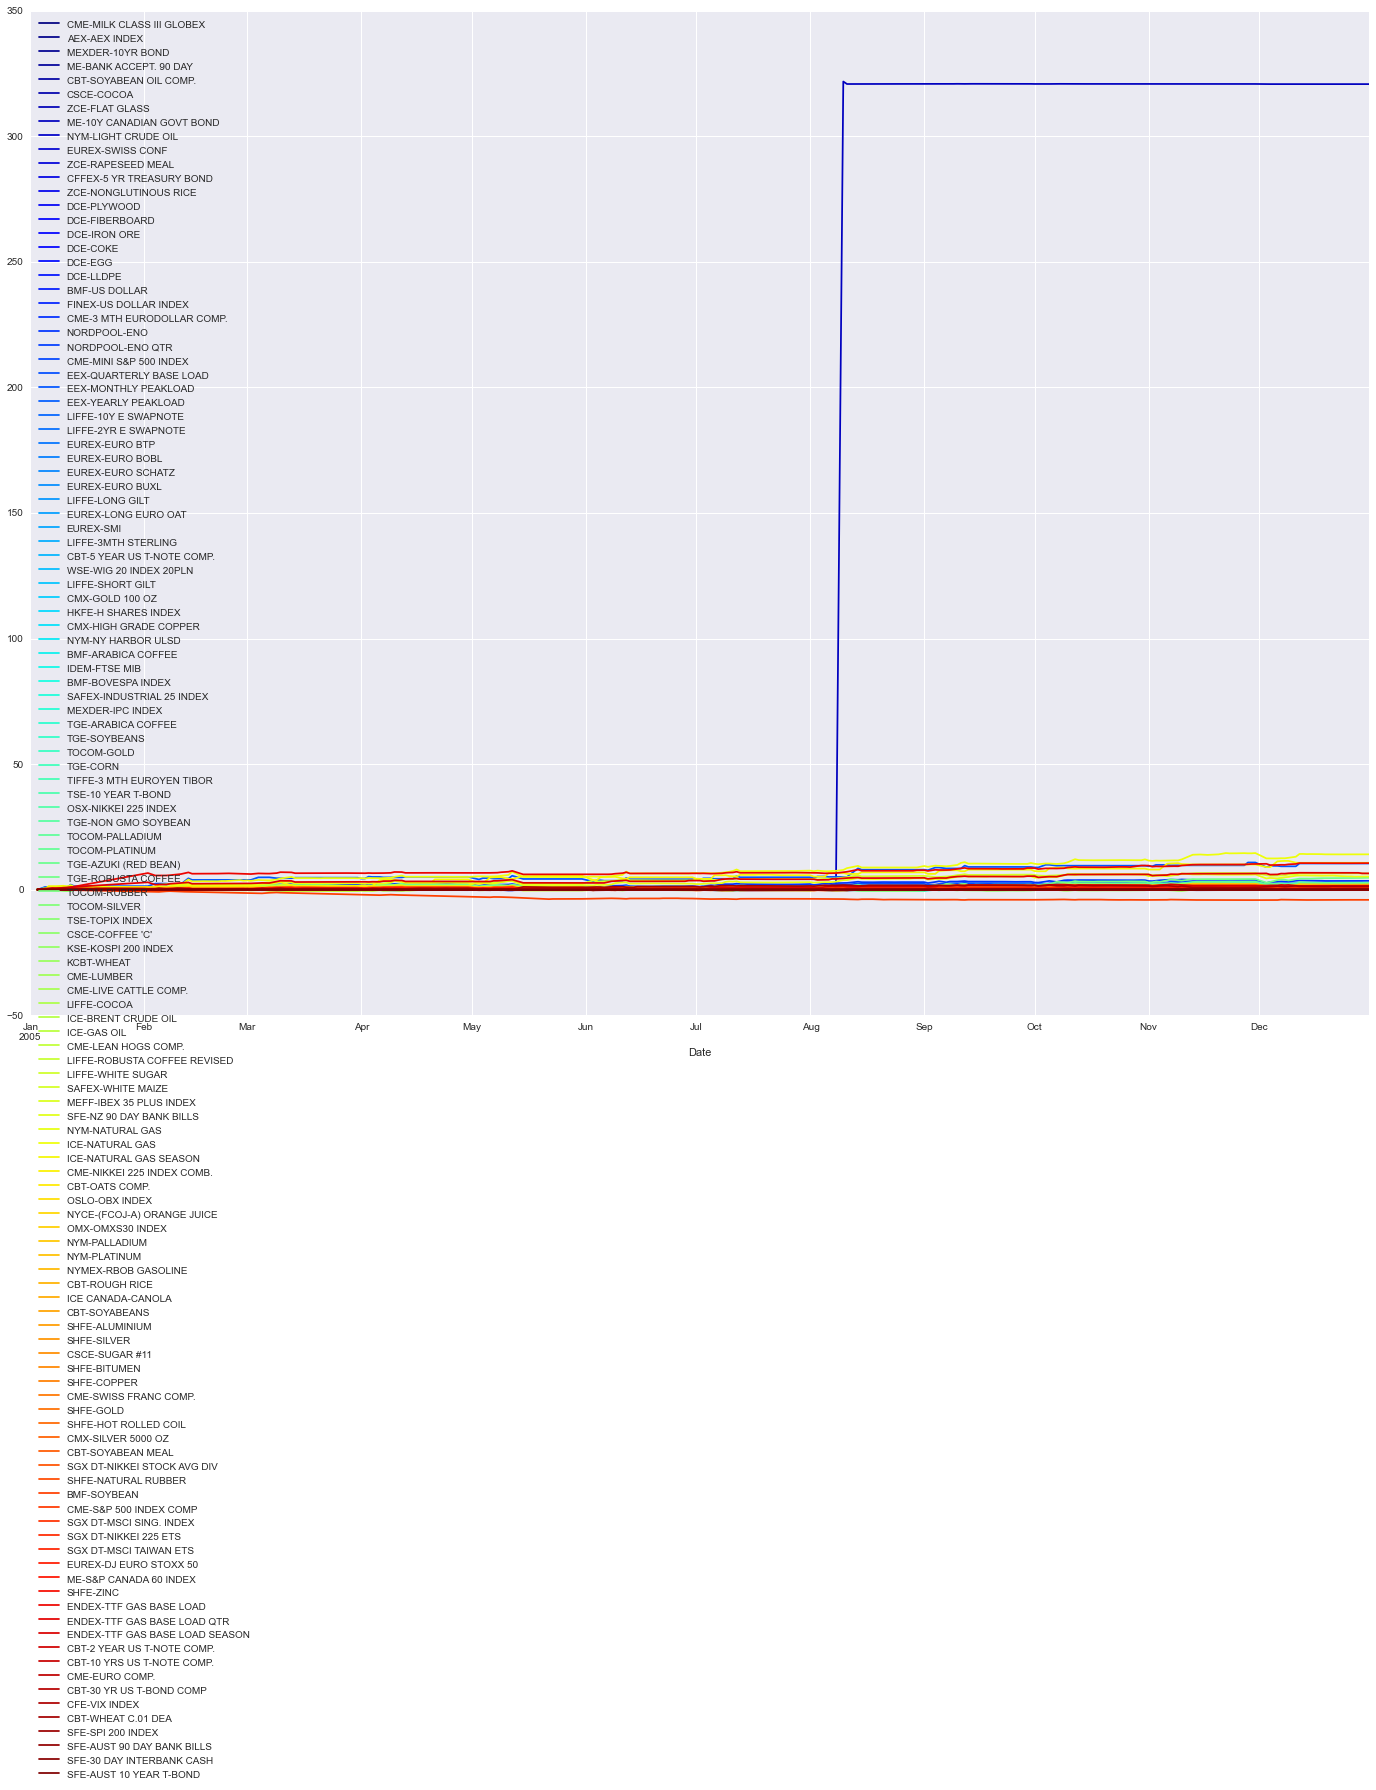

In [21]:
price['2005'].pct_change().ffill().cumsum().plot(colormap='jet')

In [23]:
qd.count().count()

98

In [24]:
price.count().count()

126

In [25]:
price.columns

Index([u'CME-MILK CLASS III GLOBEX', u'AEX-AEX INDEX', u'MEXDER-10YR BOND',
       u'ME-BANK ACCEPT. 90 DAY', u'CBT-SOYABEAN OIL COMP.', u'CSCE-COCOA',
       u'ZCE-FLAT GLASS', u'ME-10Y CANADIAN GOVT BOND', u'NYM-LIGHT CRUDE OIL',
       u'EUREX-SWISS CONF',
       ...
       u'CBT-2 YEAR US T-NOTE COMP.', u'CBT-10 YRS US T-NOTE COMP.',
       u'CME-EURO COMP.', u'CBT-30 YR US T-BOND COMP', u'CFE-VIX INDEX',
       u'CBT-WHEAT C.01 DEA', u'SFE-SPI 200 INDEX',
       u'SFE-AUST 90 DAY BANK BILLS', u'SFE-30 DAY INTERBANK CASH',
       u'SFE-AUST 10 YEAR T-BOND'],
      dtype='object', length=126)

In [29]:
df=pd.DataFrame()
df['DS']=price['CSCE-COCOA'].dropna()
df['Q']=qd.Cocoa

In [38]:
df.pct_change().corr()

,DS,Q
DS,1.000000,0.144556
Q,0.144556,1.000000


In [39]:
df.resample(rule='m',how='last').pct_change().corr()

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  if __name__ == '__main__':


,DS,Q
DS,1.000000,0.994894
Q,0.994894,1.000000


/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  if __name__ == '__main__':


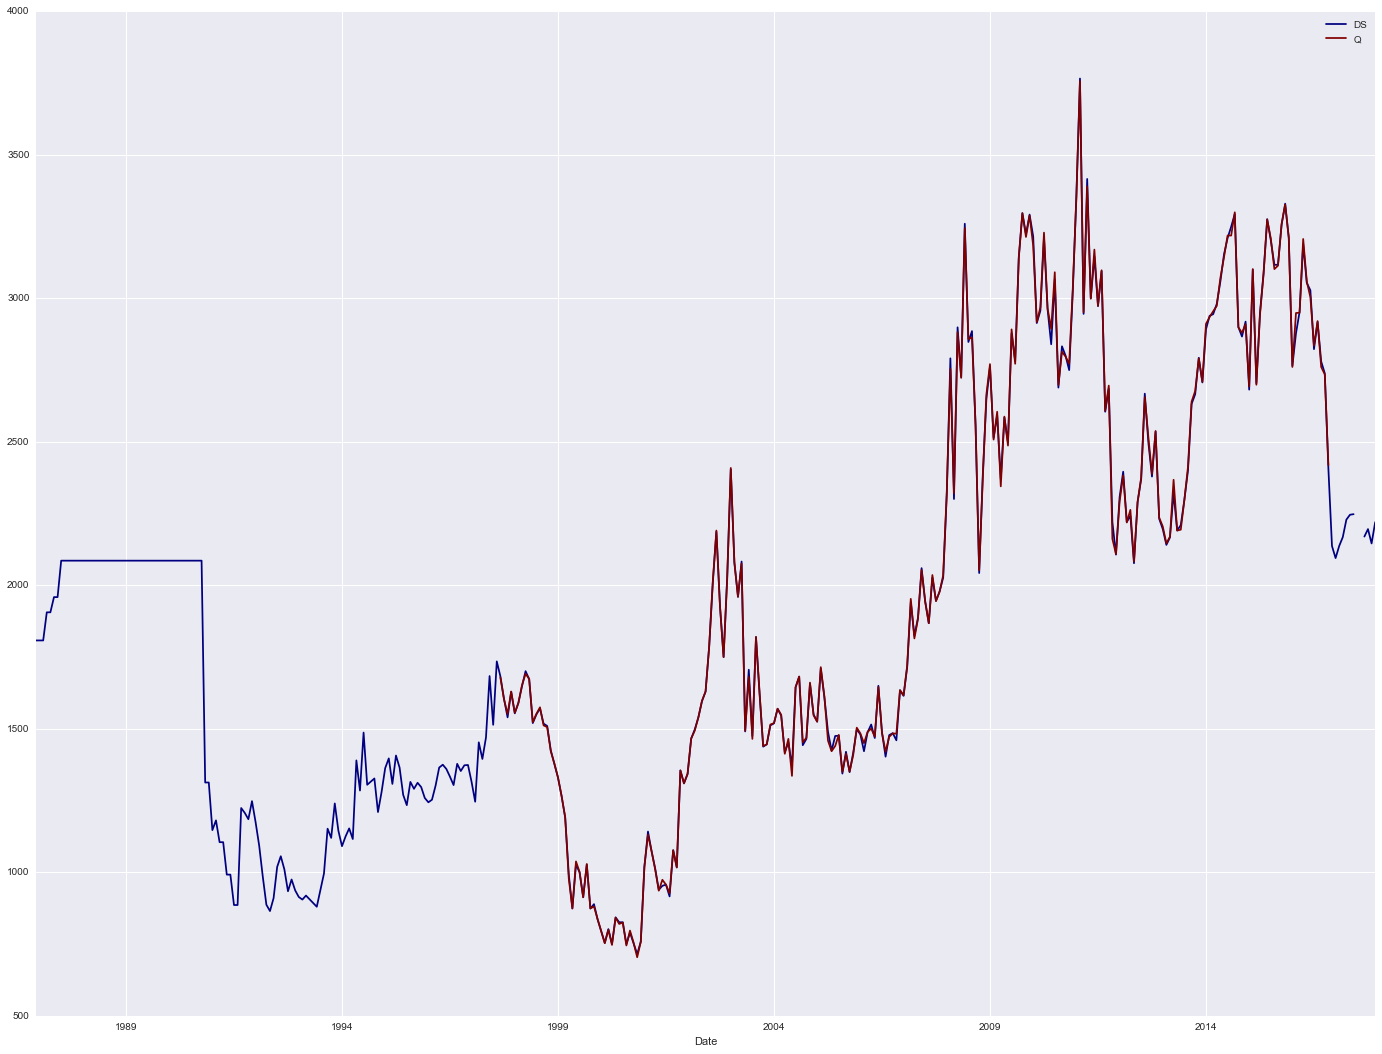

In [37]:
df.resample(rule='m',how='last').plot(colormap='jet')

In [43]:
df=pd.DataFrame()
df=price.copy()
for x in qd.columns:
    df[x]=qd[x]

In [47]:
df.resample(rule='m',how='last').pct_change().corr()

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  if __name__ == '__main__':


,CME-MILK CLASS III GLOBEX,AEX-AEX INDEX,MEXDER-10YR BOND,ME-BANK ACCEPT. 90 DAY,CBT-SOYABEAN OIL COMP.,CSCE-COCOA,ZCE-FLAT GLASS,ME-10Y CANADIAN GOVT BOND,NYM-LIGHT CRUDE OIL,EUREX-SWISS CONF,...,US Treasuries 10 Yr,Wheat,Italian 10 year bonds,Italian 2 year bonds,OMX,German Bund,German Bobl,German Schatz,German Buxl,French 10 year
CME-MILK CLASS III GLOBEX,1.000000,0.066903,0.010035,0.033684,0.034291,0.030837,0.064316,0.026017,0.161387,-0.011556,...,0.069977,0.013933,0.015675,0.006659,0.072462,-0.008327,-0.114059,0.224041,0.179699,0.027325
AEX-AEX INDEX,0.066903,1.000000,0.133285,0.008852,-0.009265,0.007669,0.260902,-0.054321,0.015678,-0.050054,...,-0.321342,0.069870,0.412075,0.251439,0.829282,0.002358,-0.427779,-0.033890,0.087529,0.209441
MEXDER-10YR BOND,0.010035,0.133285,1.000000,-0.061368,0.010955,0.021561,-0.052630,0.285475,-0.087636,0.300611,...,0.387532,0.204817,-0.004427,0.083063,0.361763,0.289114,0.243811,0.262855,0.067578,0.032070
ME-BANK ACCEPT. 90 DAY,0.033684,0.008852,-0.061368,1.000000,0.063842,-0.011246,0.030456,0.412344,-0.039645,0.073524,...,0.173202,0.065923,-0.005447,0.095379,-0.102006,-0.084967,0.150519,0.003208,-0.120746,-0.170805
CBT-SOYABEAN OIL COMP.,0.034291,-0.009265,0.010955,0.063842,1.000000,0.140102,-0.107252,-0.223542,0.276081,-0.091969,...,-0.275555,0.185668,-0.348912,-0.220118,0.083120,-0.296235,-0.059012,-0.085064,-0.429891,-0.404191
CSCE-COCOA,0.030837,0.007669,0.021561,-0.011246,0.140102,1.000000,-0.021226,-0.063767,0.148214,-0.092861,...,0.049823,0.135804,0.071290,0.214081,0.048875,-0.114992,-0.043706,-0.000700,-0.316496,-0.165517
ZCE-FLAT GLASS,0.064316,0.260902,-0.052630,0.030456,-0.107252,-0.021226,1.000000,-0.097811,0.129776,-0.021552,...,-0.107981,-0.126936,0.168470,0.152068,0.196684,0.067330,0.047285,0.102037,0.075711,0.117421
ME-10Y CANADIAN GOVT BOND,0.026017,-0.054321,0.285475,0.412344,-0.223542,-0.063767,-0.097811,1.000000,-0.094670,0.392680,...,0.570137,0.035318,0.570896,0.422305,0.149066,0.726702,0.546118,0.399004,0.670075,0.523281
NYM-LIGHT CRUDE OIL,0.161387,0.015678,-0.087636,-0.039645,0.276081,0.148214,0.129776,-0.094670,1.000000,-0.214327,...,-0.144821,0.165237,-0.433953,-0.320612,-0.085325,-0.454748,-0.276098,-0.219381,-0.351159,-0.314047
EUREX-SWISS CONF,-0.011556,-0.050054,0.300611,0.073524,-0.091969,-0.092861,-0.021552,0.392680,-0.214327,1.000000,...,0.450706,-0.050511,0.512404,0.417696,0.128243,0.687072,0.632073,0.548229,0.676403,0.488991


/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  if __name__ == '__main__':
/Users/mrefermat/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


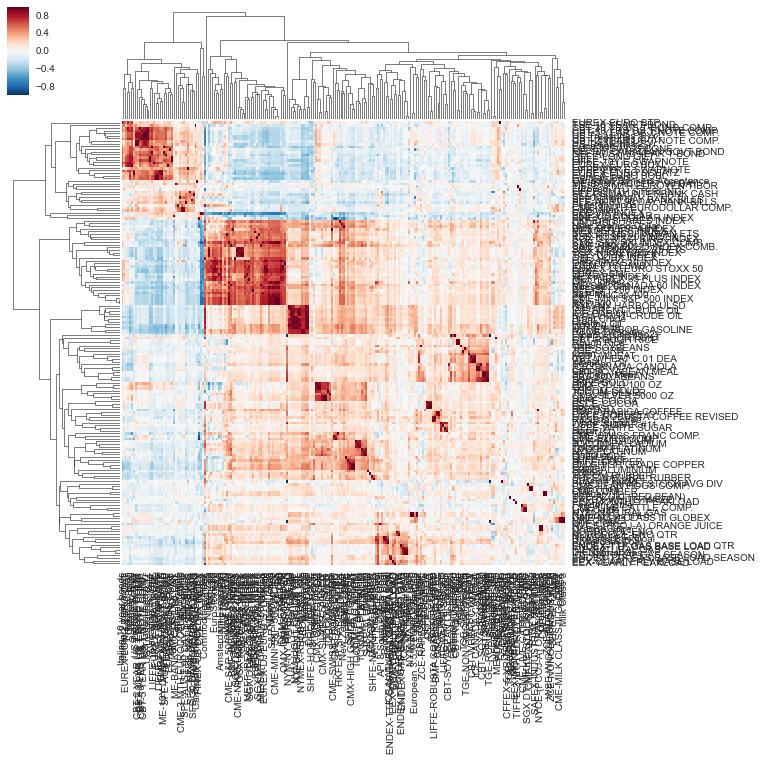

In [49]:
sns.clustermap(df.resample(rule='m',how='last').pct_change().corr().dropna())